In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
filename = 'cleaned_df.csv'

df = pd.read_csv(filename)

df = df.drop(columns='Unnamed: 0', axis=1)

df = df.rename(columns={'hospdead': 'label'})

#move label to the first position
first_column = df.pop('label') 
df.insert(0, 'label', first_column) 

print('Shape', df.shape)
df.head()

Shape (8932, 50)


,label,age,death,sex,slos,d.time,num.co,edu,scoma,charges,...,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,ca_metastatic,ca_no,ca_yes,income_$11-$25k,income_$25-$50k,income_>$50k,income_under $11k,income_unknown
0,0,62.84998,0,0,5,2029,0,11.000000,0.0,9715.0,...,1,0,1,0,0,1,0,0,0,0
1,1,60.33899,1,1,4,4,2,12.000000,44.0,34496.0,...,0,0,0,1,0,1,0,0,0,0
2,0,52.74698,1,1,17,47,2,12.000000,0.0,41094.0,...,0,0,0,1,0,0,0,0,1,0
3,0,42.38498,1,1,3,133,2,11.000000,0.0,3075.0,...,1,0,1,0,0,0,0,0,1,0
4,0,79.88495,0,1,16,2029,1,11.744707,26.0,50127.0,...,0,0,0,1,0,0,0,0,0,1


In [3]:
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   label                      8932 non-null   int64  
 1   age                        8932 non-null   float64
 2   death                      8932 non-null   int64  
 3   sex                        8932 non-null   int64  
 4   slos                       8932 non-null   int64  
 5   d.time                     8932 non-null   int64  
 6   num.co                     8932 non-null   int64  
 7   edu                        8932 non-null   float64
 8   scoma                      8932 non-null   float64
 9   charges                    8932 non-null   float64
 10  avtisst                    8932 non-null   float64
 11  sps                        8932 non-null   float64
 12  aps                        8932 non-null   float64
 13  surv2m                     8932 non-null   float

(None,
    label       age  death  sex  slos  d.time  num.co        edu  scoma  \
 0      0  62.84998      0    0     5    2029       0  11.000000    0.0   
 1      1  60.33899      1    1     4       4       2  12.000000   44.0   
 2      0  52.74698      1    1    17      47       2  12.000000    0.0   
 3      0  42.38498      1    1     3     133       2  11.000000    0.0   
 4      0  79.88495      0    1    16    2029       1  11.744707   26.0   
 
    charges  ...  dzgroup_Lung Cancer  dzgroup_MOSF w/Malig  ca_metastatic  \
 0   9715.0  ...                    1                     0              1   
 1  34496.0  ...                    0                     0              0   
 2  41094.0  ...                    0                     0              0   
 3   3075.0  ...                    1                     0              1   
 4  50127.0  ...                    0                     0              0   
 
    ca_no  ca_yes  income_$11-$25k  income_$25-$50k  income_>$50k  \
 0

Figuring out what features to use for predicting in two steps:
1. Using correlation
2. Using Random Forest Classifier

In [4]:
"""Calculating correlation with label among features"""

# Calculate the correlation with 'label'
correlation_with_label = df.corrwith(df['label']).to_frame()
correlation_with_label.columns = ['Correlation with label']

# Drop the 'label' column from the correlation results
correlation_with_label = correlation_with_label.drop(labels=['label'])

#Sort the DataFrame by the 'Correlation with label' column
correlation_with_label = correlation_with_label.sort_values(by='Correlation with label', ascending=False)



# Sort the values by the 'Correlation with label' column
corr_features = correlation_with_label.abs().sort_values(by='Correlation with label', ascending=False)
top_corr_features = corr_features.head(15)

print(top_corr_features)


                      Correlation with label
dnr                                 0.564842
surv2m                              0.557860
avtisst                             0.550724
surv6m                              0.497656
d.time                              0.485028
aps                                 0.475347
sps                                 0.462459
death                               0.402489
scoma                               0.380599
hday                                0.215997
dzgroup_Coma                        0.210134
dzgroup_CHF                         0.188887
charges                             0.187240
dzgroup_MOSF w/Malig                0.176371
bili                                0.147489


In [5]:
"""Using Random forest classifier"""

from sklearn.ensemble import RandomForestClassifier

X = df.drop('label', axis=1)  # Features
y = df['label']              # Target

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your data
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a Series for feature importances
rf_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

top_rf_features = rf_features.head(15)

# Print the feature importances
print(top_rf_features)


d.time     0.334639
avtisst    0.094367
dnr        0.093868
surv2m     0.068120
death      0.043909
aps        0.042245
surv6m     0.033289
slos       0.031294
sps        0.029490
charges    0.028702
dnrday     0.026205
scoma      0.015175
hday       0.010032
age        0.009470
meanbp     0.008673
dtype: float64


By considering both lists, we can ensure that the selected features are not only statistically significant but also have practical relevance in the model's predictions.

In [10]:
#features mixed from two methods correlation check and random forest

rf_feature_list = top_rf_features.index.tolist()
corr_feature_list = top_corr_features.index.tolist()

combined_features = list(set(rf_feature_list) | set(corr_feature_list))  # Union

final_features = combined_features[:10]

print("Set of features for predicting: ", final_features)
print("Set with more features for improving model if needed: ", combined_features)

Set of features for predicting:  ['surv6m', 'dzgroup_MOSF w/Malig', 'avtisst', 'slos', 'scoma', 'dnrday', 'dzgroup_Coma', 'age', 'meanbp', 'charges']
Set with more features for improving model if needed:  ['surv6m', 'dzgroup_MOSF w/Malig', 'avtisst', 'slos', 'scoma', 'dnrday', 'dzgroup_Coma', 'age', 'meanbp', 'charges', 'dnr', 'death', 'sps', 'bili', 'dzgroup_CHF', 'surv2m', 'aps', 'hday', 'd.time']


label
0    6633
1    2299
Name: count, dtype: int64


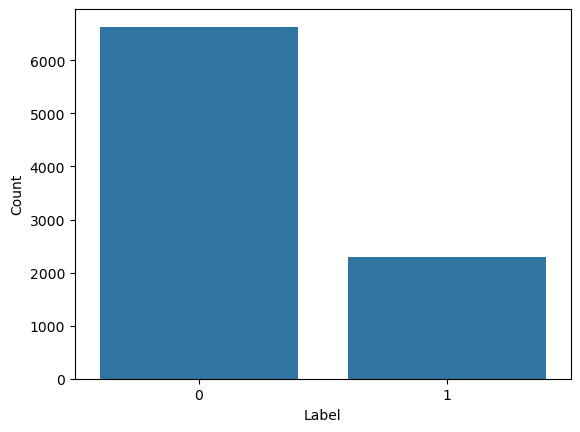

In [7]:
#check how many values of each label value

class_values = df['label'].value_counts()
print(class_values)

# Count the values of the 'label' column
class_values = df['label'].value_counts().reset_index()

# Rename columns for clarity in the plot
class_values.columns = ['Label', 'Count']

# Create the bar plot
sns.barplot(x='Label', y='Count', data=class_values)
plt.show()

Class imbalance problem? 
Solutions:
1. Under/Oversampling. 
2. Modify weight on a loss functin is the second option. 
3. Synthetic Minority Oversampling Technique (SMOTE)
##### Will fix when separating by test and training data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#Resampling_Techniques_to_Solve_Class_Imbalance

To build logistic regression  - it is important to normalize features.

The Synthetic Minority Oversampling Technique (SMOTE) is used to over-sample the minority class in a dataset and make the class distribution balanced. This technique generates synthetic samples rather than creating copies of existing samples.

In [8]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Separate input features and target
X = df.drop('label', axis=1)  # Assuming 'hospdead' is the target variable
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Summarize class distribution
print("Before SMOTE '1': {}".format(sum(y_train == 1)))
print("Before SMOTE '0': {} \n".format(sum(y_train == 0)))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE '1': {}".format(sum(y_train_smote == 1)))
print("After SMOTE '0': {}".format(sum(y_train_smote == 0)))

Before SMOTE '1': 1593
Before SMOTE '0': 4659 

After SMOTE '1': 4659
After SMOTE '0': 4659


## Decision Tree

Conducting GridSearch for finding best parametrs for the tree classifier.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the balanced training data
X_train_smote_selected = X_train_smote[final_features]  # Make sure final_features is defined
grid_search.fit(X_train_smote_selected, y_train_smote)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max

First try of the tree - without Grid Search

In [16]:

from sklearn.metrics import classification_report, confusion_matrix

# Select only the features in final_features for both training and testing sets
X_train_smote_selected = X_train_smote[final_features]
X_test_selected = X_test[final_features]

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the balanced training data
dt_classifier.fit(X_train_smote_selected, y_train_smote)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_selected)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1974
           1       0.65      0.72      0.68       706

    accuracy                           0.82      2680
   macro avg       0.77      0.79      0.78      2680
weighted avg       0.83      0.82      0.83      2680

Confusion Matrix:
[[1706  268]
 [ 201  505]]


Second Tree with Grid Search

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Select only the features in final_features for both training and testing sets
X_train_smote_selected = X_train_smote[final_features]
X_test_selected = X_test[final_features]

# Initialize the Decision Tree Classifier with the best parameters found by GridSearchCV
best_params = grid_search.best_params_
dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the classifier to the balanced training data
dt_classifier.fit(X_train_smote_selected, y_train_smote)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test_selected)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1974
           1       0.66      0.74      0.70       706

    accuracy                           0.83      2680
   macro avg       0.78      0.80      0.79      2680
weighted avg       0.84      0.83      0.83      2680

Confusion Matrix:
[[1698  276]
 [ 181  525]]


- Accuracy: The second model (0.83) is slightly more accurate than the first one (0.82)

- Precision for Class 1: Both models have the same precision for class 1 (0.65).

- Recall for Class 1: The second model has a higher recall for class 1 (0.74 vs. 0.72). This means it is better at correctly identifying the positive class.

- F1-Score for Class 1: The second model also has a higher F1-score for class 1 (0.69 vs. 0.68), indicating a better balance between precision and recall for the positive class.

- Overall Macro and Weighted Averages: The second model has higher macro and weighted averages for precision, recall, and F1-score, indicating better overall performance across both classes.

Based on these metrics, the second classification report indicates a slightly better performance, especially in terms of recall and the F1-score for class 1. 

Confusion Matrix:
[[1698  276]
 [ 181  525]]


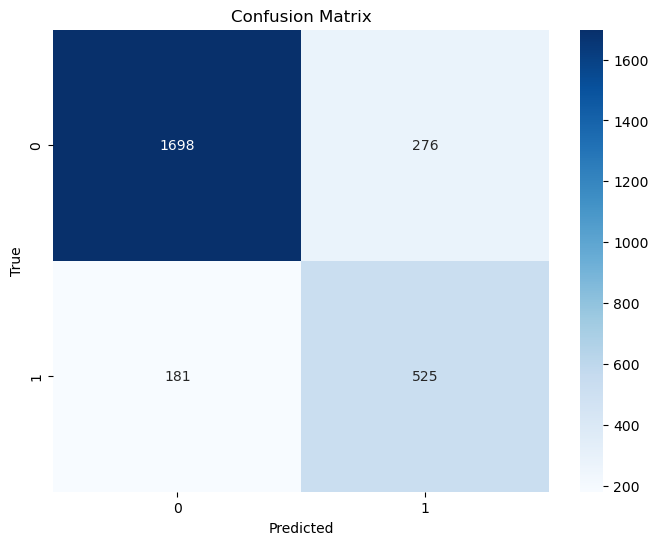

In [32]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can create a more visual representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(dt_classifier, X[final_features], y, cv=5, scoring='accuracy')

print("Accuracy scores for each fold are:", scores)
print("Mean cross-validation accuracy:", scores.mean())
print("Standard deviation of cross-validation accuracy:", scores.std())


Accuracy scores for each fold are: [0.8461108  0.85002798 0.86114222 0.84322508 0.83930571]
Mean cross-validation accuracy: 0.8479623584792744
Standard deviation of cross-validation accuracy: 0.007467034892603227


The low standard deviation in the accuracy scores indicates that model is stable, showing similar performance across different data samples. This suggests good generalizability to unseen data. The range of accuracy scores is tight, which implies consistent performance. There are no significant outliers or folds where the model performs exceptionally poorly or exceptionally well, which is a positive indicator of model reliability.
The model appears to be performing well with an average accuracy of around 84.8%, and it seems to generalize well across different subsets of the data.

## Logistic Regression

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate input features and target
X = df[final_features]  # Using your final selected features
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaled training data (after SMOTE) and transform the testing data
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the scaled and balanced training data
log_reg.fit(X_train_scaled, y_train_smote)

# Making predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluating the model
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1974
           1       0.66      0.78      0.71       706

    accuracy                           0.83      2680
   macro avg       0.79      0.82      0.80      2680
weighted avg       0.85      0.83      0.84      2680

Confusion Matrix:
[[1687  287]
 [ 156  550]]
Accuracy: 0.8347014925373134


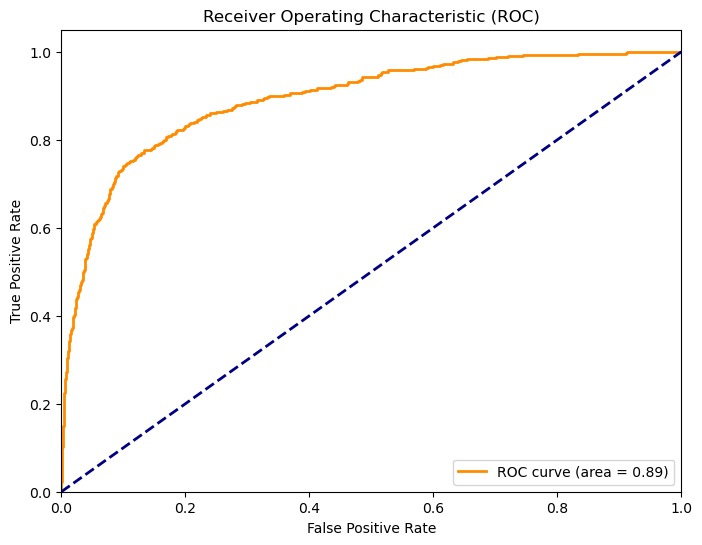

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


The AUC value ranges from 0 to 1, with higher values indicating better model performance. A model with an AUC close to 1 is considered to have good separability between the classes, whereas an AUC close to 0.5 suggests no discriminative power, akin to random guessing.

To improve LogisticRegression results we can try GridSearchCV with some hyperparametrs like C (Inverse of regularization strength) where smaller values specify stronger regularization which is applied to avoid overfitting by penalizing large coefficients, penalty and solver (Algorithm to use in the optimization problem).

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work well with l1 and l2 penalties
}

# Initialize the logistic regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV (make sure to use scaled and balanced data if necessary)
grid_search_lr.fit(X_train_scaled, y_train_smote)

# Print the best parameters
print("Best parameters found: ", grid_search_lr.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s

[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, sol

In [28]:
best_params_lr = grid_search_lr.best_params_

log_reg_best = LogisticRegression(**best_params_lr, random_state=42)

# Fit the model on the scaled and balanced training data
log_reg_best.fit(X_train_scaled, y_train_smote)

# Making predictions on the test set
y_pred = log_reg_best.predict(X_test_scaled)

# Evaluating the model
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Printing the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.88      1974
           1       0.66      0.78      0.71       706

    accuracy                           0.84      2680
   macro avg       0.79      0.82      0.80      2680
weighted avg       0.85      0.84      0.84      2680

Confusion Matrix:
[[1688  286]
 [ 156  550]]
Accuracy: 0.8350746268656717


Recall and accuracy is 0.01 better then regular model which is not significant improvement. However, in healthcare field even that could help

Confusion Matrix:
[[1688  286]
 [ 156  550]]


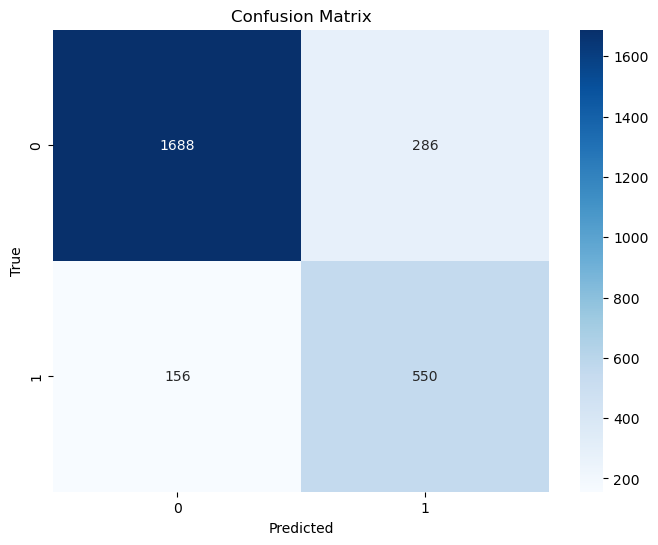

In [29]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can create a more visual representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Ensemble model of DT, LogisticRegression and RandomTree

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1974
           1       0.69      0.77      0.73       706

    accuracy                           0.85      2680
   macro avg       0.80      0.82      0.81      2680
weighted avg       0.85      0.85      0.85      2680

Confusion Matrix:
[[1726  248]
 [ 162  544]]
Accuracy: 0.8470149253731343


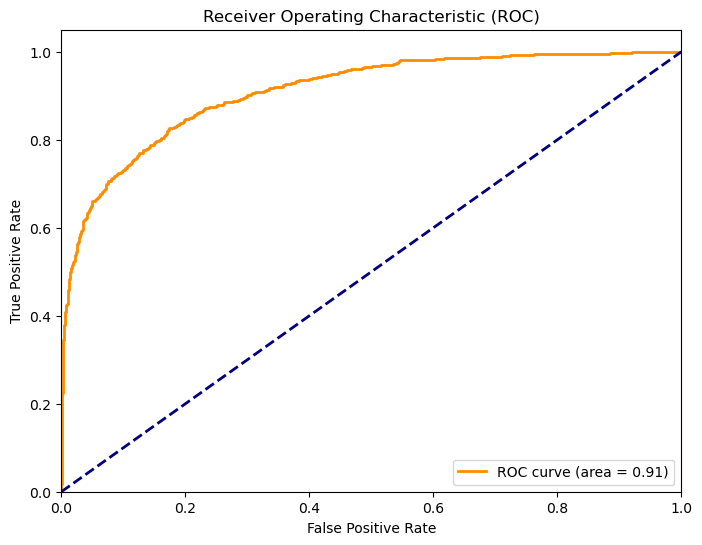

In [26]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier


random_forest = RandomForestClassifier(random_state=42)

# Create a voting ensemble of the models (two have been already created previously)
voting_clf = VotingClassifier(
    estimators=[('dt', dt_classifier), ('lr', log_reg_best), ('rf', random_forest)],
    voting='soft'  # or 'hard' depending on your preference
)

# Fit the ensemble model
voting_clf.fit(X_train_scaled, y_train_smote)

# Making predictions on the test set
y_pred = voting_clf.predict(X_test_scaled)
y_probs = voting_clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class

# Evaluate the ensemble model using classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[1726  248]
 [ 162  544]]


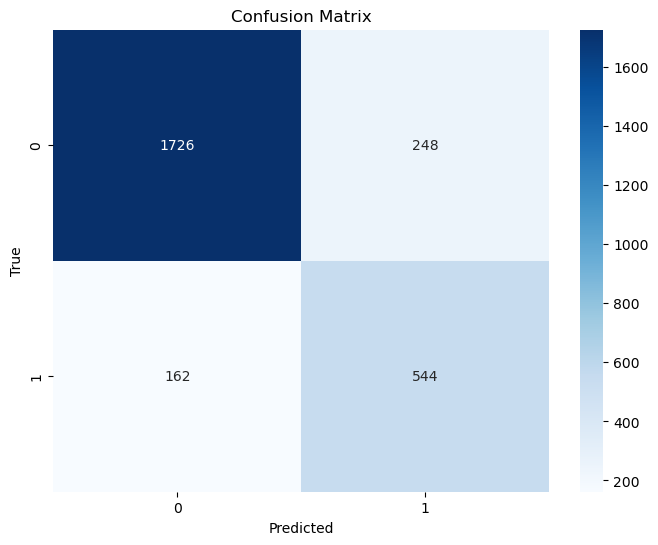

In [27]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can create a more visual representation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import  cross_validate

# Define your scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'roc_auc': 'roc_auc'}

# Perform cross-validation
cv_results = cross_validate(voting_clf, X[final_features], y, cv=5, scoring=scoring)

# Print the cross-validation results for each metric
print("Cross-validated accuracy scores:", cv_results['test_accuracy'])
print("Mean cross-validation accuracy:", cv_results['test_accuracy'].mean())
print("Cross-validated ROC AUC scores:", cv_results['test_roc_auc'])
print("Mean cross-validation ROC AUC:", cv_results['test_roc_auc'].mean())


Cross-validated accuracy scores: [0.85394516 0.86961388 0.88409854 0.87010078 0.85610302]
Mean cross-validation accuracy: 0.866772277823349
Cross-validated ROC AUC scores: [0.91213427 0.90362865 0.92316937 0.90727589 0.88937307]
Mean cross-validation ROC AUC: 0.9071162492295484


In the evaluation of the ensemble model using cross-validation, the results indicate a consistently high performance across various data subsets. The accuracy scores, ranging from approximately 85.4% to 88.4%, suggest a reliably strong performance in correctly predicting the target variable, with an average accuracy of 86.7%. This consistent accuracy across different folds reflects the model's robustness and reliability. Additionally, the model demonstrates excellent discriminative ability, as evidenced by the ROC AUC scores which vary between 88.9% and 92.3%, averaging at 90.7%. The high ROC AUC scores across all folds highlight the model's effectiveness in distinguishing between the classes, a critical aspect in classification tasks.

These results, characterized by high accuracy and ROC AUC scores, underscore the ensemble model's capability to make correct predictions and its proficiency in differentiating between positive and negative classes. The stability of these metrics across multiple folds suggests that the model is not only effective but also consistent, ensuring its applicability and reliability for unseen data. Such performance is particularly significant in contexts where predictive accuracy and the ability to discern between classes are paramount. Nevertheless, it's essential to interpret these findings in the context of the specific application domain, considering the implications of false positives and false negatives, which vary in significance across different fields. Further validation, possibly involving domain experts, might be warranted for high-stakes applications to ensure comprehensive and contextually relevant model evaluation.